<a href="https://colab.research.google.com/github/surpha/mVQA/blob/main/divide/VQA/Connecting%20Text%20and%20Images/Hierarchical_Co_Attention_VQA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the Colab environment

In [1]:
!git clone https://github.com/Axe--/Visual-Question-Answering.git

Cloning into 'Visual-Question-Answering'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 165 (delta 10), reused 5 (delta 5), pack-reused 147
Receiving objects: 100% (165/165), 372.44 KiB | 1.82 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [2]:
# Step 1: Install required dependencies
!pip install cython
!sudo apt-get install python3-dev

# Step 2: Clone the COCO API repository
!git clone https://github.com/cocodataset/cocoapi.git

# Step 3: Build the Python API
%cd cocoapi/PythonAPI
!make

# Step 4: Install the Python API into the Python environment
!make install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask'

In [9]:
from pycocotools.coco import COCO


In [3]:
%ls

dist/     pycocoDemo.ipynb      pycocotools/           setup.py
Makefile  pycocoEvalDemo.ipynb  pycocotools.egg-info/


In [4]:
%cd /content/Visual-Question-Answering

/content/Visual-Question-Answering


In [5]:
%ls

assets/        dataloader.py  model.py         README.md         utils.py
datahelper.py  main.py        prepare_data.py  requirements.txt


In [6]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement apex==0.1 (from versions: 0.9.8dev.linux-i686, 0.9.8.dev0, 0.9.8a0.dev0, 0.9.9.dev0, 0.9.10.dev0)
ERROR: No matching distribution found for apex==0.1


In [7]:
!pip install apex

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.8/709.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
!pip install matplotlib
!pip install numpy
!pip install Pillow
!pip install tensorboardX
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [12]:
import json
import os
import argparse

In [13]:
os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip -P zip/')
os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip -P zip/')
os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Test_mscoco.zip -P zip/')
os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip -P zip/')
os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip -P zip/')

2304

In [19]:
# os.system('unzip /content/Visual-Question-Answering/zip/v2_Annotations_Train_mscoco.zip -d annotations/')
# os.system('unzip /content/Visual-Question-Answering/zip/v2_Annotations_Val_mscoco.zip -d annotations/')
# os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Test_mscoco.zip -d annotations/')
# os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Train_mscoco.zip -d annotations/')
# os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Val_mscoco.zip -d annotations/')

0

In [15]:
os.system('mkdir -p annotations/train_annotations/')
os.system('mkdir -p annotations/val_annotations/')
os.system('mkdir -p questions/test_questions/')
os.system('mkdir -p questions/train_questions/')
os.system('mkdir -p questions/val_questions/')


0

In [20]:
os.system('unzip /content/Visual-Question-Answering/zip/v2_Annotations_Train_mscoco.zip -d annotations/train_annotations/')
os.system('unzip /content/Visual-Question-Answering/zip/v2_Annotations_Val_mscoco.zip -d annotations/val_annotations/')
os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Test_mscoco.zip -d questions/test_questions/')
os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Train_mscoco.zip -d questions/train_questions/')
os.system('unzip /content/Visual-Question-Answering/zip/v2_Questions_Val_mscoco.zip -d questions/val_questions/')

0

In [23]:
import os

output_dir = '/content/Visual-Question-Answering/processed/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Execute the prepare_data.py script with the provided command
os.system('python3 /content/Visual-Question-Answering/prepare_data.py \
--balanced_real_images -s train \
-a /content/Visual-Question-Answering/annotations/train_annotations/v2_mscoco_train2014_annotations.json \
-q /content/Visual-Question-Answering/questions/train_questions/v2_OpenEnded_mscoco_train2014_questions.json \
-o /content/Visual-Question-Answering/processed/vqa_train2014.txt \
-v /content/Visual-Question-Answering/processed/vocab_count_5_K_1000.pickle -c 5 -K 1000')


0

In [25]:
# Given the VQA Dataset's annotations & questions file, generates a dataset file (.txt) in the following format:

# image_name \t question \t answer

# image_name is the image file name from the COCO dataset
# question is a comma-separated sequence
# answer is a string (label)

In [26]:
# Open the generated file in read mode
with open('/content/Visual-Question-Answering/processed/vqa_train2014.txt', 'r') as file:
    # Read and print the first few lines
    for i in range(5):  # Print the first 5 lines
        print(file.readline())


COCO_train2014_000000458752.jpg	What,is,this,photo,taken,looking,through?	net

COCO_train2014_000000458752.jpg	What,position,is,this,man,playing?	pitcher

COCO_train2014_000000458752.jpg	What,color,is,the,players,shirt?	orange

COCO_train2014_000000458752.jpg	Is,this,man,a,professional,baseball,player?	yes

COCO_train2014_000000262146.jpg	What,color,is,the,snow?	white



In [27]:
os.system('python3 /content/Visual-Question-Answering/prepare_data.py \
--balanced_real_images -s val \
-a /content/Visual-Question-Answering/annotations/val_annotations/v2_mscoco_val2014_annotations.json \
-q /content/Visual-Question-Answering/questions/val_questions/v2_OpenEnded_mscoco_val2014_questions.json \
-o /content/Visual-Question-Answering/processed/vqa_val2014.txt')

0

In [28]:
# Open the generated file in read mode
with open('/content/Visual-Question-Answering/processed/vqa_val2014.txt', 'r') as file:
    # Read and print the first few lines
    for i in range(5):  # Print the first 5 lines
        print(file.readline())

COCO_val2014_000000262148.jpg	Where,is,he,looking?	down

COCO_val2014_000000262148.jpg	What,are,the,people,in,the,background,doing?	watching

COCO_val2014_000000262148.jpg	What,is,he,on,top,of?	picnic table

COCO_val2014_000000393225.jpg	What,website,copyrighted,the,picture?	foodiebakercom

COCO_val2014_000000393225.jpg	Is,this,a,creamy,soup?	no



Baseline
The architecture can be summarized as:-

Image --> CNN_encoder --> image_embedding
Question --> LSTM_encoder --> question_embedding

(image_embedding * question_embedding) --> MLP_Classifier --> answer_logit

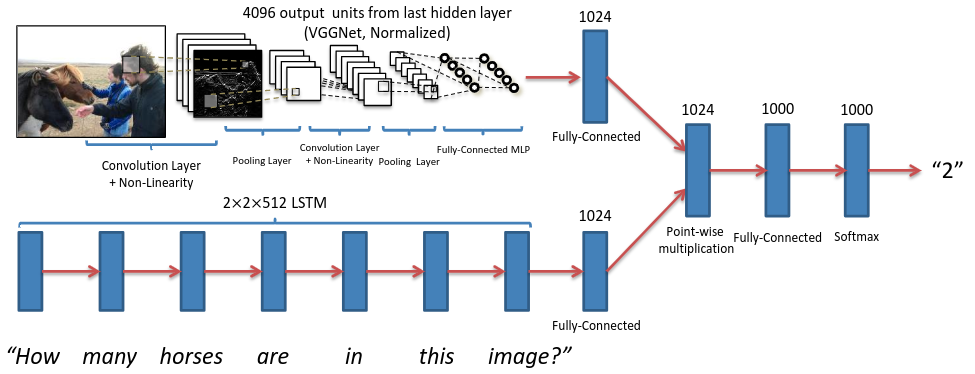

Hierarchical Co-Attention
The architecture can be summarized as:-

Image --> CNN_encoder --> image_embedding
Question --> Word_Emb --> Phrase_Conv_MaxPool --> Sentence_LSTM --> question_embedding

ParallelCoAttention( image_embedding, question_embedding ) --> MLP_Classifier --> answer_logit

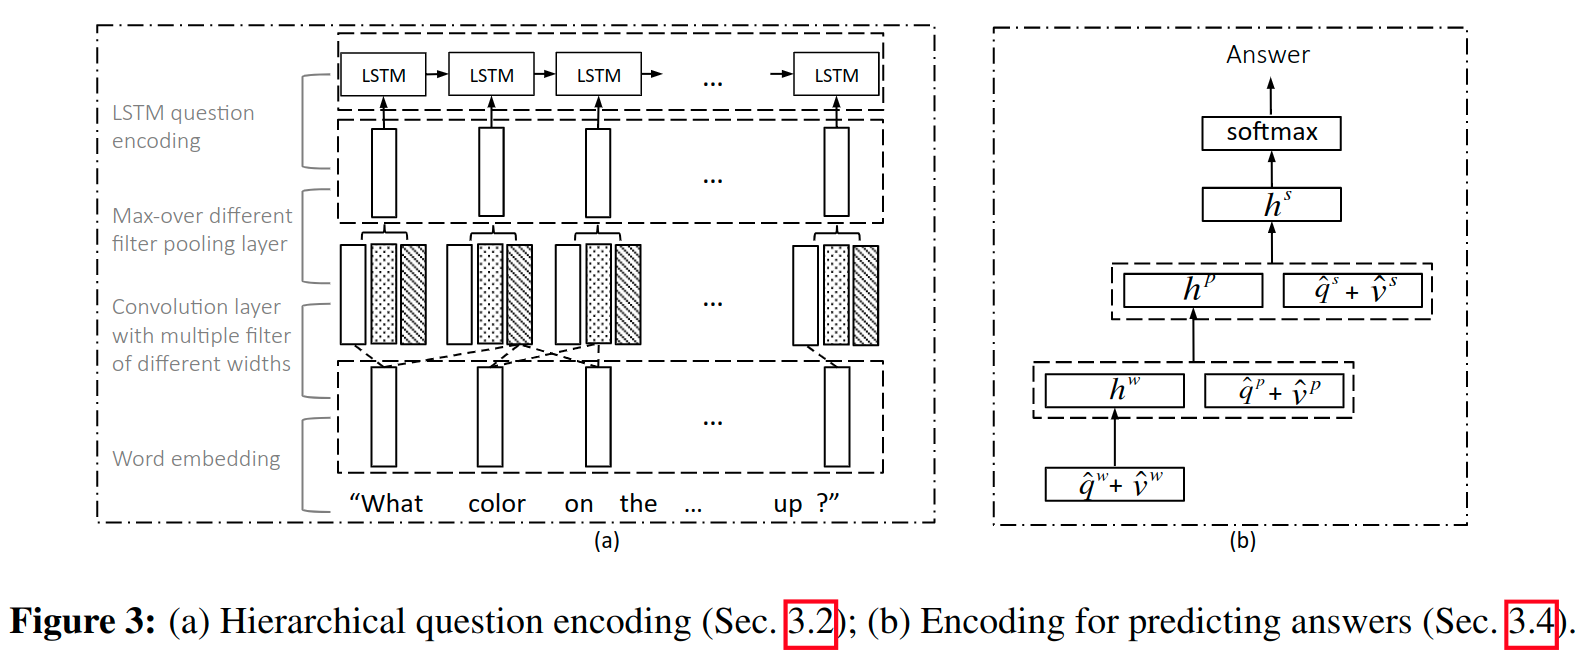

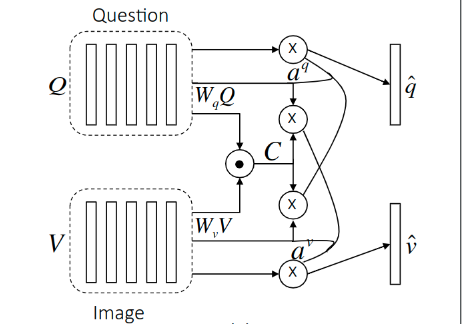

In [42]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" apex

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859


In [71]:
!pip uninstall apex
!pip install apex


Found existing installation: apex 0.9.10.dev0
Uninstalling apex-0.9.10.dev0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/apex-0.9.10.dev0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/apex/*
Proceed (Y/n)? Y
  Successfully uninstalled apex-0.9.10.dev0
  Using cached apex-0.9.10.dev0-py3-none-any.whl


In [73]:
!pip install pyramid

In [75]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 11638, done.
remote: Counting objects: 100% (3731/3731), done.
remote: Compressing objects: 100% (579/579), done.
remote: Total 11638 (delta 3371), reused 3280 (delta 3149), pack-reused 7907
Receiving objects: 100% (11638/11638), 15.47 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (8173/8173), done.


In [76]:
cd apex

/content/Visual-Question-Answering/apex


In [77]:
pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/Visual-Question-Answering/apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.2 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Running command Getting requirements to build wheel
    running egg_info
    writing setuptools.egg-info/PKG-INFO
    writing dependency_links to setuptools.egg-info/dependency_links.txt
    writing entry points to setuptools.egg-info/entry_points.txt
    writing requirements to setuptools.egg-info/requires.txt
    writing top-level names to setuptools.egg-in

In [74]:
# importing apex in notebook and commenting out from the main.py


!python3 main.py \
--mode train \
--expt_name K_1000_Attn \
--expt_dir /content/results_log \
--train_img /content/train2014 \
--train_file /content/Visual-Question-Answering/processed/vqa_train2014.txt \
--val_img /content/val2014 \
--val_file /content/Visual-Question-Answering/processed/vqa_val2014.txt \
--vocab_file /content/Visual-Question-Answering/processed/vocab_count_5_K_1000.pickle \
--save_interval 1000 \
--log_interval 100 \
--gpu_id 0 \
--num_epochs 50 \
--batch_size 160 \
-K 1000 \
-lr 1e-4 \
--opt_lvl 1 \
--num_workers 6 \
--run_name O1_wrk_6_bs_160 \
--model attention

Traceback (most recent call last):
  File "/content/Visual-Question-Answering/main.py", line 10, in <module>
    import apex.amp as amp
  File "/usr/local/lib/python3.10/dist-packages/apex/__init__.py", line 13, in <module>
    from pyramid.session import UnencryptedCookieSessionFactoryConfig
ImportError: cannot import name 'UnencryptedCookieSessionFactoryConfig' from 'pyramid.session' (unknown location)


In [44]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" apex

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859


In [46]:
import os

# Create the directory if it doesn't exist
os.makedirs('/content/Visual-Question-Answering/Pre_Trained_Models/', exist_ok=True)

# Download the pre-trained model checkpoint file
!wget -O /content/Visual-Question-Answering/Pre_Trained_Models/vgg11_bn-6002323d.pth https://download.pytorch.org/models/vgg11_bn-6002323d.pth


--2024-04-01 18:12:08--  https://download.pytorch.org/models/vgg11_bn-6002323d.pth
Resolving download.pytorch.org (download.pytorch.org)... 18.154.144.43, 18.154.144.35, 18.154.144.38, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.154.144.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 531503671 (507M) [application/octet-stream]
Saving to: ‘/content/Visual-Question-Answering/Pre_Trained_Models/vgg11_bn-6002323d.pth’

/content/Visual-Que 100%[===================>] 506.88M  86.6MB/s    in 6.3s    

2024-04-01 18:12:14 (79.9 MB/s) - ‘/content/Visual-Question-Answering/Pre_Trained_Models/vgg11_bn-6002323d.pth’ saved [531503671/531503671]



In [62]:
import os

# Create the directory if it doesn't exist
os.makedirs('images/train_images/', exist_ok=True)

# Download the zip file
os.system('wget http://images.cocodataset.org/zips/train2014.zip -P zip/')

# Unzip the downloaded file into the specified directory
os.system('unzip /content/Visual-Question-Answering/zip/train2014.zip -d images/train_images/')
print("Extraction completed.")

Extraction completed.


In [61]:
%ls

annotations/   dataloader.py  prepare_data.py      __pycache__/  requirements.txt
assets/        main.py        Pre_Trained_Models/  questions/    utils.py
datahelper.py  model.py       processed/           README.md     zip/


In [63]:
expt_dir = '/content/Visual-Question-Answering/results_log'
expt_name = 'demo_expt'
run_name = 'demo_run'

# this needs to be changed
train_img = '/content/Visual-Question-Answering/images/train_images/train2014'

train_file = '/content/Visual-Question-Answering/processed/vqa_train2014.txt'
val_img = '/content/Visual-Question-Answering/images/train_images/train2014'
val_file = '/content/Visual-Question-Answering/processed/vqa_val2014.txt'
vocab_file = '/content/Visual-Question-Answering/processed/vocab_count_5_K_1000.pickle'
vgg_wts_path = '/content/Visual-Question-Answering/Pre_Trained_Models/vgg11_bn-6002323d.pth'

In [65]:
# utils.py mein PATH_VGG_WEIGHTS = /content/Visual-Question-Answering/Pre_Trained_Models/vgg11_bn-6002323d.pth

